<h1><center>MNIST classification using Keras<center></h1>

# Importing Keras

In [3]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import numpy as np
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.3.0
Using keras version 2.4.3


## Loading and preparing the MNIST dataset

Again, load the dataset via ```keras.datasets```, turn train and test labels into one-hot encoding, and reshape and normalize data as in the first exercise. 

In [9]:
from keras.datasets import mnist
# START CODE HERE
(train_images, y_train), (test_images, y_test) = mnist.load_data()
# END CODE HERE

In [5]:
from keras.utils.np_utils import to_categorical
# START CODE HERE
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# END CODE HERE

In [6]:
# Reshape to proper images with 1 color channel according to backend scheme
img_rows, img_cols = train_images.shape[1], train_images.shape[2]
train_images = train_images.reshape((-1, (img_rows*img_cols)))
# START CODE HERE
img_rows, img_cols = test_images.shape[1], test_images.shape[2]
test_images = test_images.reshape((-1, (img_rows*img_cols)))
# END CODE HERE

# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?
# START CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
test_images= scaler.transform(test_images)
# END CODE HERE

(60000, 784)


## Defining the neural network architecture (i.e., the network model)

You can take a look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic commands to use keras.

First, try to replicate the classifier of the first exercise. Secondly, create a fully connected network.
For the fully connected layer, you can for example use this architecture: 
$$ (784) \rightarrow (300) \rightarrow (10) $$
For this first implementation of the network, use only sigmoid activations in the hidden layer. Remember to use the right output activation function ! 

In [5]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# START CODE HERE
input_shape = train_images.shape[1]
output_shape = 300
model = Sequential([
   Dense(output_shape, activation='sigmoid', input_shape=(input_shape,)),
    Flatten(),
   Dense(10, activation='softmax')])
# END CODE HERE

Instantiate a SGD optimizer with a tentative learning rate of $\\eta = 10^{-2}$ and, using the appropriate loss function (which is called, in keras, ```'categorical_crossentropy'```) and compile the model.

In [6]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from keras import optimizers

# START CODE HERE
model.compile(
   optimizer='sgd',
   loss='categorical_crossentropy',
   metrics=['accuracy']
)
# END CODE HERE
# We can now have a look at the defined model topology
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
flatten (Flatten)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Training the network

Train the model for 10 epochs using the ```.fit()``` method, validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable ```.fit()``` verbose mode in order to visualize the training.

In order to accelerate training, use the ```batch_size``` option of ```.fit()```, which will process a batch of examples at the same time, and make one update for all of them, averaged over the gradients for each training example of the batch. You can begin with a small size, and experiment with a larger size later.

In [7]:
# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10

# START CODE HERE
history = model.fit(
   x=train_images,
   y=y_train,
   epochs=epochs,
   batch_size=64,
    verbose = 1, 
   validation_data = (test_images, y_test)
)
# END CODE HERE

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 1.0022 - accuracy: 0.7733 - val_loss: 0.5715 - val_accuracy: 0.8670
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4972 - accuracy: 0.8746 - val_loss: 0.4225 - val_accuracy: 0.8895
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4033 - accuracy: 0.8910 - val_loss: 0.3664 - val_accuracy: 0.8995
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3597 - accuracy: 0.8995 - val_loss: 0.3366 - val_accuracy: 0.9038
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3335 - accuracy: 0.9053 - val_loss: 0.3167 - val_accuracy: 0.9098
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3154 - accuracy: 0.9098 - val_loss: 0.3035 - val_accuracy: 0.9121
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3020 - accuracy: 0.9139 - val_loss: 0.2929 - val_accuracy: 0.9157
Epoch 

## Visualizing the network performance

Visualize the training history using the ```pyplot``` package:
- In one graph, plot the train and vaidation loss functions,
- In another graph, the train and validation accuracy.
By comparing the training the testing curves, what can we conclude about the quality of the training ?

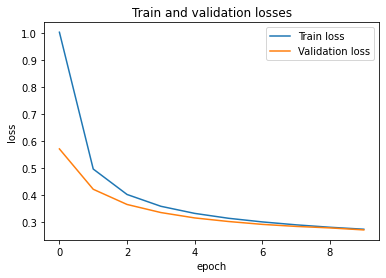

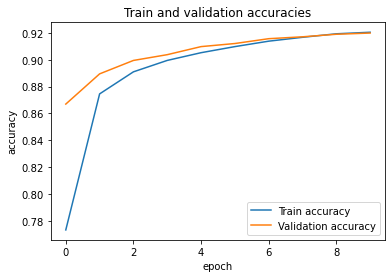

In [8]:
# We now want to plot the train and validation loss functions and accuracy curves
#print(history.history.keys())

# summarize history for loss
# START CODE HERE
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train and validation losses')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train loss', 'Validation loss'], loc='best')
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train and validation accuracies')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train accuracy', 'Validation accuracy'], loc='best')
# END CODE HERE
plt.show()


Given these curves, we can conclude that the training is quite good.

## Experiments

Note down the performance of the larger network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the size of the batch and compare the performance with reference.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Experiment with a larger architecture, for example: 
$$ (784) \rightarrow (300) \rightarrow (128) \rightarrow (84) \rightarrow (10) $$

### Reference 

In [9]:
ref = model.evaluate(test_images, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2725 - accuracy: 0.9199: 0s - loss: 0.2697 - accuracy: 0.92


### Increasing the size of the batch : 

Epoch 1/10
600/600 [==============================] - 4s 7ms/step - loss: 1.1939 - accuracy: 0.7284 - val_loss: 0.7159 - val_accuracy: 0.8451
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.6090 - accuracy: 0.8568 - val_loss: 0.5081 - val_accuracy: 0.8768
Epoch 3/10
600/600 [==============================] - 4s 6ms/step - loss: 0.4788 - accuracy: 0.8782 - val_loss: 0.4292 - val_accuracy: 0.8892
Epoch 4/10
600/600 [==============================] - 3s 6ms/step - loss: 0.4189 - accuracy: 0.8893 - val_loss: 0.3862 - val_accuracy: 0.8969
Epoch 5/10
600/600 [==============================] - 3s 6ms/step - loss: 0.3834 - accuracy: 0.8955 - val_loss: 0.3596 - val_accuracy: 0.9003
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.3595 - accuracy: 0.9002 - val_loss: 0.3406 - val_accuracy: 0.9040
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.3419 - accuracy: 0.9038 - val_loss: 0.3267 - val_accuracy: 0.9072
Epoch 

55/55 [==============================] - 1s 26ms/step - loss: 1.4981 - accuracy: 0.6849 - val_loss: 1.3751 - val_accuracy: 0.7305
Epoch 4/10
55/55 [==============================] - 1s 26ms/step - loss: 1.3052 - accuracy: 0.7348 - val_loss: 1.2092 - val_accuracy: 0.7702
Epoch 5/10
55/55 [==============================] - 2s 28ms/step - loss: 1.1609 - accuracy: 0.7680 - val_loss: 1.0836 - val_accuracy: 0.7935
Epoch 6/10
55/55 [==============================] - 2s 34ms/step - loss: 1.0500 - accuracy: 0.7884 - val_loss: 0.9857 - val_accuracy: 0.8098
Epoch 7/10
55/55 [==============================] - 2s 30ms/step - loss: 0.9626 - accuracy: 0.8043 - val_loss: 0.9081 - val_accuracy: 0.8214
Epoch 8/10
55/55 [==============================] - 1s 25ms/step - loss: 0.8924 - accuracy: 0.8161 - val_loss: 0.8450 - val_accuracy: 0.8329
Epoch 9/10
55/55 [==============================] - 1s 26ms/step - loss: 0.8347 - accuracy: 0.8248 - val_loss: 0.7927 - val_accuracy: 0.8413
Epoch 10/10
313/313 [===

Epoch 6/10
29/29 [==============================] - 1s 37ms/step - loss: 1.4375 - accuracy: 0.7136 - val_loss: 1.3736 - val_accuracy: 0.7345
Epoch 7/10
29/29 [==============================] - 1s 37ms/step - loss: 1.3381 - accuracy: 0.7375 - val_loss: 1.2811 - val_accuracy: 0.7568
Epoch 8/10
29/29 [==============================] - 1s 38ms/step - loss: 1.2529 - accuracy: 0.7564 - val_loss: 1.2014 - val_accuracy: 0.7736
Epoch 9/10
29/29 [==============================] - 1s 34ms/step - loss: 1.1794 - accuracy: 0.7723 - val_loss: 1.1326 - val_accuracy: 0.7860
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.0726 - accuracy: 0.7950
Epoch 1/10
28/28 [==============================] - 2s 61ms/step - loss: 2.3084 - accuracy: 0.1757 - val_loss: 2.1293 - val_accuracy: 0.3062
Epoch 2/10
28/28 [==============================] - 1s 43ms/step - loss: 2.0319 - accuracy: 0.4030 - val_loss: 1.9261 - val_accuracy: 0.4931
Epoch 3/10
28/28 [==============================] - 1

20/20 [==============================] - 1s 65ms/step - loss: 1.4852 - accuracy: 0.7016 - val_loss: 1.4293 - val_accuracy: 0.7203
Epoch 9/10
20/20 [==============================] - 1s 63ms/step - loss: 1.4126 - accuracy: 0.7215 - val_loss: 1.3603 - val_accuracy: 0.7399
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.2978 - accuracy: 0.7537
Epoch 1/10
19/19 [==============================] - 2s 92ms/step - loss: 2.2764 - accuracy: 0.2080 - val_loss: 2.1545 - val_accuracy: 0.2613
Epoch 2/10
19/19 [==============================] - 2s 93ms/step - loss: 2.0948 - accuracy: 0.3321 - val_loss: 2.0064 - val_accuracy: 0.4334
Epoch 3/10
19/19 [==============================] - 2s 84ms/step - loss: 1.9598 - accuracy: 0.4672 - val_loss: 1.8797 - val_accuracy: 0.5335
Epoch 4/10
19/19 [==============================] - 1s 73ms/step - loss: 1.8412 - accuracy: 0.5512 - val_loss: 1.7665 - val_accuracy: 0.6073
Epoch 5/10
19/19 [==============================] - 1s 63ms/step

Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.3244 - accuracy: 0.7654
Epoch 1/10
17/17 [==============================] - 1s 81ms/step - loss: 2.3271 - accuracy: 0.1714 - val_loss: 2.1688 - val_accuracy: 0.2514
Epoch 2/10
17/17 [==============================] - 1s 67ms/step - loss: 2.0994 - accuracy: 0.3490 - val_loss: 2.0138 - val_accuracy: 0.4609
Epoch 3/10
17/17 [==============================] - 1s 68ms/step - loss: 1.9656 - accuracy: 0.4903 - val_loss: 1.8926 - val_accuracy: 0.5547
Epoch 4/10
17/17 [==============================] - 1s 68ms/step - loss: 1.8525 - accuracy: 0.5611 - val_loss: 1.7846 - val_accuracy: 0.6108
Epoch 5/10
17/17 [==============================] - 1s 68ms/step - loss: 1.7510 - accuracy: 0.6113 - val_loss: 1.6873 - val_accuracy: 0.6494
Epoch 6/10
17/17 [==============================] - 1s 68ms/step - loss: 1.6594 - accuracy: 0.6484 - val_loss: 1.5995 - val_accuracy: 0.6825
Epoch 7/10
17/17 [==============================] - 1

13/13 [==============================] - 2s 123ms/step - loss: 2.3515 - accuracy: 0.1271 - val_loss: 2.2189 - val_accuracy: 0.2045
Epoch 2/10
13/13 [==============================] - 1s 89ms/step - loss: 2.1489 - accuracy: 0.2819 - val_loss: 2.0783 - val_accuracy: 0.3385
Epoch 3/10
13/13 [==============================] - 1s 82ms/step - loss: 2.0314 - accuracy: 0.3810 - val_loss: 1.9759 - val_accuracy: 0.4226
Epoch 4/10
13/13 [==============================] - 1s 82ms/step - loss: 1.9385 - accuracy: 0.4634 - val_loss: 1.8884 - val_accuracy: 0.5013
Epoch 5/10
13/13 [==============================] - 1s 87ms/step - loss: 1.8565 - accuracy: 0.5286 - val_loss: 1.8089 - val_accuracy: 0.5661
Epoch 6/10
13/13 [==============================] - 1s 89ms/step - loss: 1.7812 - accuracy: 0.5817 - val_loss: 1.7356 - val_accuracy: 0.6131
Epoch 7/10
13/13 [==============================] - 1s 84ms/step - loss: 1.7116 - accuracy: 0.6198 - val_loss: 1.6675 - val_accuracy: 0.6503
Epoch 8/10
13/13 [=====

Epoch 3/10
12/12 [==============================] - 1s 102ms/step - loss: 2.1079 - accuracy: 0.3529 - val_loss: 2.0448 - val_accuracy: 0.4265
Epoch 4/10
12/12 [==============================] - 1s 95ms/step - loss: 2.0165 - accuracy: 0.4359 - val_loss: 1.9584 - val_accuracy: 0.4938
Epoch 5/10
12/12 [==============================] - 1s 95ms/step - loss: 1.9345 - accuracy: 0.4988 - val_loss: 1.8792 - val_accuracy: 0.5479
Epoch 6/10
12/12 [==============================] - 1s 97ms/step - loss: 1.8588 - accuracy: 0.5461 - val_loss: 1.8056 - val_accuracy: 0.5895
Epoch 7/10
12/12 [==============================] - 1s 93ms/step - loss: 1.7884 - accuracy: 0.5855 - val_loss: 1.7372 - val_accuracy: 0.6231
Epoch 8/10
12/12 [==============================] - 1s 94ms/step - loss: 1.7228 - accuracy: 0.6141 - val_loss: 1.6734 - val_accuracy: 0.6482
Epoch 9/10
12/12 [==============================] - 1s 100ms/step - loss: 1.6617 - accuracy: 0.6385 - val_loss: 1.6140 - val_accuracy: 0.6691
Epoch 10/10

Epoch 5/10
10/10 [==============================] - 1s 95ms/step - loss: 2.0005 - accuracy: 0.4189 - val_loss: 1.9543 - val_accuracy: 0.4674
Epoch 6/10
10/10 [==============================] - 1s 96ms/step - loss: 1.9324 - accuracy: 0.4803 - val_loss: 1.8874 - val_accuracy: 0.5241
Epoch 7/10
10/10 [==============================] - 1s 94ms/step - loss: 1.8681 - accuracy: 0.5330 - val_loss: 1.8243 - val_accuracy: 0.5732
Epoch 8/10
10/10 [==============================] - 1s 94ms/step - loss: 1.8075 - accuracy: 0.5753 - val_loss: 1.7647 - val_accuracy: 0.6084
Epoch 9/10
10/10 [==============================] - 1s 97ms/step - loss: 1.7503 - accuracy: 0.6104 - val_loss: 1.7086 - val_accuracy: 0.6388
Epoch 10/10
313/313 [==============================] - 0s 2ms/step - loss: 1.6557 - accuracy: 0.6646
Epoch 1/10
10/10 [==============================] - 1s 124ms/step - loss: 2.3288 - accuracy: 0.1600 - val_loss: 2.2556 - val_accuracy: 0.1856
Epoch 2/10
10/10 [==============================] - 

Epoch 7/10
9/9 [==============================] - 1s 101ms/step - loss: 1.9078 - accuracy: 0.5153 - val_loss: 1.8724 - val_accuracy: 0.5414
Epoch 8/10
9/9 [==============================] - 1s 100ms/step - loss: 1.8548 - accuracy: 0.5489 - val_loss: 1.8199 - val_accuracy: 0.5746
Epoch 9/10
9/9 [==============================] - 1s 97ms/step - loss: 1.8044 - accuracy: 0.5771 - val_loss: 1.7699 - val_accuracy: 0.6049
Epoch 10/10
313/313 [==============================] - 0s 2ms/step - loss: 1.7222 - accuracy: 0.6301
Epoch 1/10
9/9 [==============================] - 1s 123ms/step - loss: 2.2815 - accuracy: 0.1601 - val_loss: 2.1938 - val_accuracy: 0.2415
Epoch 2/10
9/9 [==============================] - 1s 97ms/step - loss: 2.1627 - accuracy: 0.2826 - val_loss: 2.1106 - val_accuracy: 0.3604
Epoch 3/10
9/9 [==============================] - 1s 108ms/step - loss: 2.0878 - accuracy: 0.3923 - val_loss: 2.0418 - val_accuracy: 0.4422
Epoch 4/10
9/9 [==============================] - 1s 118ms/st

Epoch 9/10
9/9 [==============================] - 1s 99ms/step - loss: 1.8181 - accuracy: 0.5681 - val_loss: 1.7760 - val_accuracy: 0.6045
Epoch 10/10
313/313 [==============================] - 0s 2ms/step - loss: 1.7248 - accuracy: 0.6316
Epoch 1/10
9/9 [==============================] - 1s 120ms/step - loss: 2.4217 - accuracy: 0.0868 - val_loss: 2.3484 - val_accuracy: 0.1007
Epoch 2/10
9/9 [==============================] - 1s 92ms/step - loss: 2.3048 - accuracy: 0.1289 - val_loss: 2.2510 - val_accuracy: 0.1700
Epoch 3/10
9/9 [==============================] - 1s 96ms/step - loss: 2.2169 - accuracy: 0.2091 - val_loss: 2.1708 - val_accuracy: 0.2582
Epoch 4/10
9/9 [==============================] - 1s 116ms/step - loss: 2.1418 - accuracy: 0.2924 - val_loss: 2.0989 - val_accuracy: 0.3335
Epoch 5/10
9/9 [==============================] - 1s 114ms/step - loss: 2.0732 - accuracy: 0.3649 - val_loss: 2.0321 - val_accuracy: 0.4032
Epoch 6/10
9/9 [==============================] - 1s 113ms/ste

313/313 [==============================] - 0s 2ms/step - loss: 1.7888 - accuracy: 0.5822
Epoch 1/10
8/8 [==============================] - 1s 154ms/step - loss: 2.4911 - accuracy: 0.0901 - val_loss: 2.3706 - val_accuracy: 0.1219
Epoch 2/10
8/8 [==============================] - 1s 126ms/step - loss: 2.3263 - accuracy: 0.1484 - val_loss: 2.2516 - val_accuracy: 0.2006
Epoch 3/10
8/8 [==============================] - 1s 151ms/step - loss: 2.2243 - accuracy: 0.2216 - val_loss: 2.1668 - val_accuracy: 0.2757
Epoch 4/10
8/8 [==============================] - 1s 149ms/step - loss: 2.1477 - accuracy: 0.2901 - val_loss: 2.0981 - val_accuracy: 0.3355
Epoch 5/10
8/8 [==============================] - 1s 126ms/step - loss: 2.0832 - accuracy: 0.3515 - val_loss: 2.0370 - val_accuracy: 0.3943
Epoch 6/10
8/8 [==============================] - 1s 115ms/step - loss: 2.0247 - accuracy: 0.4088 - val_loss: 1.9801 - val_accuracy: 0.4465
Epoch 7/10
8/8 [==============================] - 1s 110ms/step - loss:

Epoch 2/10
8/8 [==============================] - 1s 123ms/step - loss: 2.3373 - accuracy: 0.1296 - val_loss: 2.2632 - val_accuracy: 0.1850
Epoch 3/10
8/8 [==============================] - 1s 124ms/step - loss: 2.2432 - accuracy: 0.2016 - val_loss: 2.1827 - val_accuracy: 0.2517
Epoch 4/10
8/8 [==============================] - 1s 113ms/step - loss: 2.1691 - accuracy: 0.2617 - val_loss: 2.1142 - val_accuracy: 0.3154
Epoch 5/10
8/8 [==============================] - 1s 114ms/step - loss: 2.1041 - accuracy: 0.3266 - val_loss: 2.0523 - val_accuracy: 0.3876
Epoch 6/10
8/8 [==============================] - 1s 109ms/step - loss: 2.0444 - accuracy: 0.3919 - val_loss: 1.9941 - val_accuracy: 0.4473
Epoch 7/10
8/8 [==============================] - 1s 110ms/step - loss: 1.9880 - accuracy: 0.4462 - val_loss: 1.9388 - val_accuracy: 0.5000
Epoch 8/10
8/8 [==============================] - 1s 114ms/step - loss: 1.9344 - accuracy: 0.4919 - val_loss: 1.8861 - val_accuracy: 0.5388
Epoch 9/10
8/8 [====

Epoch 6/10
7/7 [==============================] - 1s 120ms/step - loss: 2.0357 - accuracy: 0.3849 - val_loss: 1.9958 - val_accuracy: 0.4288
Epoch 7/10
7/7 [==============================] - 1s 121ms/step - loss: 1.9850 - accuracy: 0.4304 - val_loss: 1.9463 - val_accuracy: 0.4748
Epoch 8/10
7/7 [==============================] - 1s 124ms/step - loss: 1.9370 - accuracy: 0.4702 - val_loss: 1.8991 - val_accuracy: 0.5080
Epoch 9/10
7/7 [==============================] - 1s 126ms/step - loss: 1.8912 - accuracy: 0.5021 - val_loss: 1.8540 - val_accuracy: 0.5374
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.8107 - accuracy: 0.5661
Epoch 1/10
7/7 [==============================] - 1s 163ms/step - loss: 2.3938 - accuracy: 0.1248 - val_loss: 2.3171 - val_accuracy: 0.1763
Epoch 2/10
7/7 [==============================] - 1s 122ms/step - loss: 2.2810 - accuracy: 0.2072 - val_loss: 2.2371 - val_accuracy: 0.2415
Epoch 3/10
7/7 [==============================] - 1s 123ms/

Epoch 8/10
7/7 [==============================] - 1s 118ms/step - loss: 1.9482 - accuracy: 0.4644 - val_loss: 1.9099 - val_accuracy: 0.4975
Epoch 9/10
7/7 [==============================] - 1s 120ms/step - loss: 1.9024 - accuracy: 0.5009 - val_loss: 1.8647 - val_accuracy: 0.5305
Epoch 10/10
313/313 [==============================] - 0s 2ms/step - loss: 1.8214 - accuracy: 0.5610
Epoch 1/10
7/7 [==============================] - 1s 189ms/step - loss: 2.4792 - accuracy: 0.1164 - val_loss: 2.3598 - val_accuracy: 0.1807
Epoch 2/10
7/7 [==============================] - 1s 114ms/step - loss: 2.3056 - accuracy: 0.2082 - val_loss: 2.2332 - val_accuracy: 0.2464
Epoch 3/10
7/7 [==============================] - 1s 115ms/step - loss: 2.1985 - accuracy: 0.2649 - val_loss: 2.1445 - val_accuracy: 0.2991
Epoch 4/10
7/7 [==============================] - 1s 117ms/step - loss: 2.1205 - accuracy: 0.3160 - val_loss: 2.0749 - val_accuracy: 0.3495
Epoch 5/10
7/7 [==============================] - 1s 120ms/

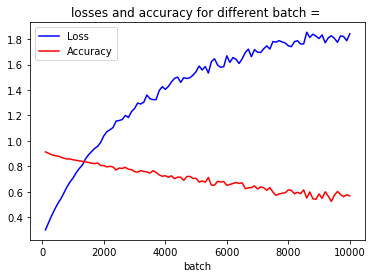

In [10]:
epochs = 10
input_shape = train_images.shape[1]
output_shape = 300

loss = []
acc = []

for i in [100+k*100 for k in range(100)]:
    model = Sequential([
       Dense(output_shape, activation='sigmoid', input_shape=(input_shape,)),
        Flatten(),
       Dense(10, activation='softmax')])
    model.compile(
       optimizer='sgd',
       loss='categorical_crossentropy',
       metrics=['accuracy']
    )
    history_batch = model.fit(
    x=train_images,
    y=y_train,
    epochs=epochs,
    batch_size=i,
    verbose = 1,
    validation_data = (test_images, y_test))
    loss.append(model.evaluate(test_images, y_test)[0])
    acc.append(model.evaluate(test_images, y_test)[1])
plt.plot([100+k*100 for k in range(100)], loss, c='blue')
plt.plot([100+k*100 for k in range(100)], acc, c='red')
plt.title('losses and accuracy for different batch = ')
plt.xlabel('batch')
plt.legend(['Loss', 'Accuracy'], loc='best')
plt.show()

We can thus see that increasing the size of the batch decreases the computation time. However, it also increases the loss and decreases the accucary

### Replacing the sigmoid activations with ReLus

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5091 - accuracy: 0.8610 - val_loss: 0.2906 - val_accuracy: 0.9183
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2550 - accuracy: 0.9280 - val_loss: 0.2334 - val_accuracy: 0.9355
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2047 - accuracy: 0.9416 - val_loss: 0.2040 - val_accuracy: 0.9427
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1758 - accuracy: 0.9499 - val_loss: 0.1866 - val_accuracy: 0.9480
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1559 - accuracy: 0.9561 - val_loss: 0.1719 - val_accuracy: 0.9517
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1403 - accuracy: 0.9610 - val_loss: 0.1613 - val_accuracy: 0.9549
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1281 - accuracy: 0.9642 - val_loss: 0.1540 - val_accuracy: 0.9570
Epoch 

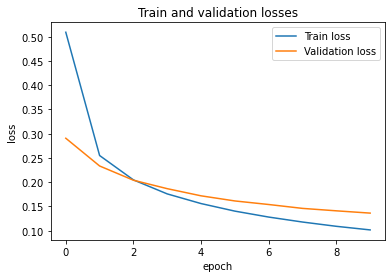

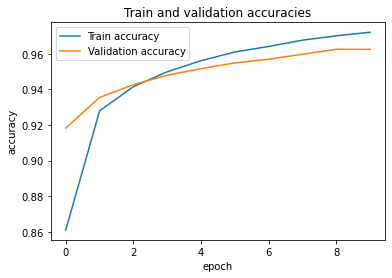

In [11]:
model = Sequential([
   Dense(output_shape, activation='relu', input_shape=(input_shape,)),
    Flatten(),
   Dense(10, activation='softmax')])
model.compile(
   optimizer='sgd',
   loss='categorical_crossentropy',
   metrics=['accuracy']
)
history = model.fit(
   x=train_images,
   y=y_train,
   epochs=epochs,
   batch_size=64,
    verbose = 1, 
   validation_data = (test_images, y_test)
)

# summarize history for loss
# START CODE HERE
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train and validation losses')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train loss', 'Validation loss'], loc='best')
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train and validation accuracies')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train accuracy', 'Validation accuracy'], loc='best')
# END CODE HERE
plt.show()


In [12]:
model.evaluate(test_images, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9625


[0.13623665273189545, 0.9624999761581421]

Replacing the sigmoid activation by ReLu allows to have better performances than with the sigmoid activation.

### Larger architecture

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3019 - accuracy: 0.1113 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 

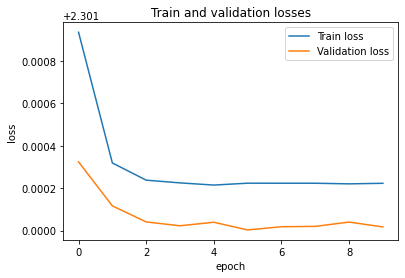

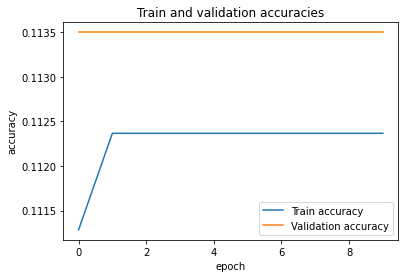

In [14]:
model = Sequential([
   Dense(output_shape, activation='sigmoid', input_shape=(input_shape,)),
    Flatten(),
   Dense(128, activation='softmax'),
    Flatten(),
    Dense(84, activation='softmax'),
    Flatten(),
    Dense(10, activation='softmax')
    ])
model.compile(
   optimizer='sgd',
   loss='categorical_crossentropy',
   metrics=['accuracy']
)
history = model.fit(
   x=train_images,
   y=y_train,
   epochs=epochs,
   batch_size=64,
    verbose = 1, 
   validation_data = (test_images, y_test)
)

# summarize history for loss
# START CODE HERE
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train and validation losses')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train loss', 'Validation loss'], loc='best')
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train and validation accuracies')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train accuracy', 'Validation accuracy'], loc='best')
# END CODE HERE
plt.show()


In this case, it can be seen that increasing the architecture leads to worse performances.